In [ ]:
!module purge
!module load apps/anaconda3
!module load compilers/nvidia/cuda/11.2
!module load compilers/gcc/8.3.0

In [ ]:

import cv2
import os
import random

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras


In [ ]:
tf.__version__

'2.8.0'

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)


In [ ]:
train_dir = "/home/191112024/splited_dataset/AGCCPF/train"
test_dir = "/home/191112024/splited_dataset/AGCCPF/test"
valid_dir = "/home/191112024/splited_dataset/AGCCPF/validate"


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        )

valid_generator = test_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=20,
        )

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=20,
        )

Found 5253 images belonging to 3 classes.
Found 1315 images belonging to 3 classes.
Found 1644 images belonging to 3 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras.applications import DenseNet121
# conv_base = VGG16(weights='imagenet',
#                   include_top=False,
#                   input_shape=(200, 200, 3))


# conv_base = EfficientNetB7(weights='imagenet',
#                   include_top=False,
#                   input_shape=(150, 150, 3))

conv_base = DenseNet121(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

# conv_base = MobileNet(weights='imagenet',
#                   include_top=False,
#                   input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 206, 206, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 100, 100, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:
model = keras.models.Sequential()
model.add(conv_base)
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(3, activation='softmax'))



In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "model_dencenet.h5", save_best_only=True)
earlystop_cb = keras.callbacks.EarlyStopping(
    patience=5, restore_best_weights=True)


In [ ]:
model.summary(0)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 6, 6, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 256)               9437440   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 16,475,715
Trainable params: 16,392,067
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=250,
                    epochs=200,
                    validation_data=valid_generator,
                    validation_steps=60,
                    callbacks=[checkpoint_cb])


Epoch 1/25
250/250 [==============================] - 177s 575ms/step - loss: 1.1763 - acc: 0.5015 - val_loss: 1.0621 - val_acc: 0.5367
Epoch 2/25
250/250 [==============================] - 133s 531ms/step - loss: 0.9233 - acc: 0.5548 - val_loss: 1.1368 - val_acc: 0.5717
Epoch 3/25
250/250 [==============================] - 129s 514ms/step - loss: 0.8567 - acc: 0.5940 - val_loss: 1.2249 - val_acc: 0.5675
Epoch 4/25
250/250 [==============================] - 128s 509ms/step - loss: 0.8059 - acc: 0.6143 - val_loss: 1.7961 - val_acc: 0.6117
Epoch 5/25
250/250 [==============================] - 131s 524ms/step - loss: 0.7587 - acc: 0.6559 - val_loss: 1.7128 - val_acc: 0.6125
Epoch 6/25
250/250 [==============================] - 128s 512ms/step - loss: 0.7042 - acc: 0.6916 - val_loss: 1.4253 - val_acc: 0.6217
Epoch 7/25
250/250 [==============================] - 127s 507ms/step - loss: 0.6406 - acc: 0.7262 - val_loss: 1.5792 - val_acc: 0.6500
Epoch 8/25
250/250 [============================

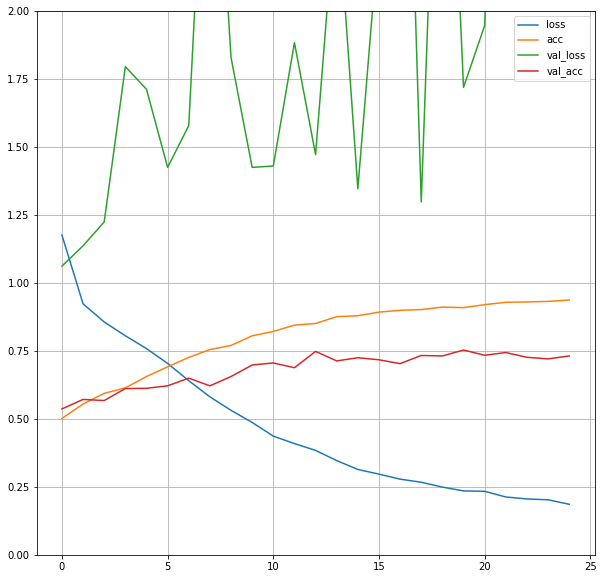

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 10))
plt.ylim((0,2))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(test_generator)

83/83 [==============================] - 16s 191ms/step - loss: 5.0667 - acc: 0.7305


[5.066746711730957, 0.7305352687835693]

In [ ]:
x=model.predict(train_generator)
actual=train_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 163,  537,  221],
       [ 482, 1629,  669],
       [ 268,  908,  376]])

In [ ]:
x=model.predict(valid_generator)
actual=valid_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 34, 162,  35],
       [109, 491,  96],
       [ 61, 252,  75]])

In [ ]:
x=model.predict(test_generator)
actual=test_generator.labels
pred=np.argmax(x, axis=-1)
from sklearn.metrics import confusion_matrix
confusion_matrix(actual,pred)

array([[ 50, 199,  39],
       [120, 597, 153],
       [ 73, 330,  83]])